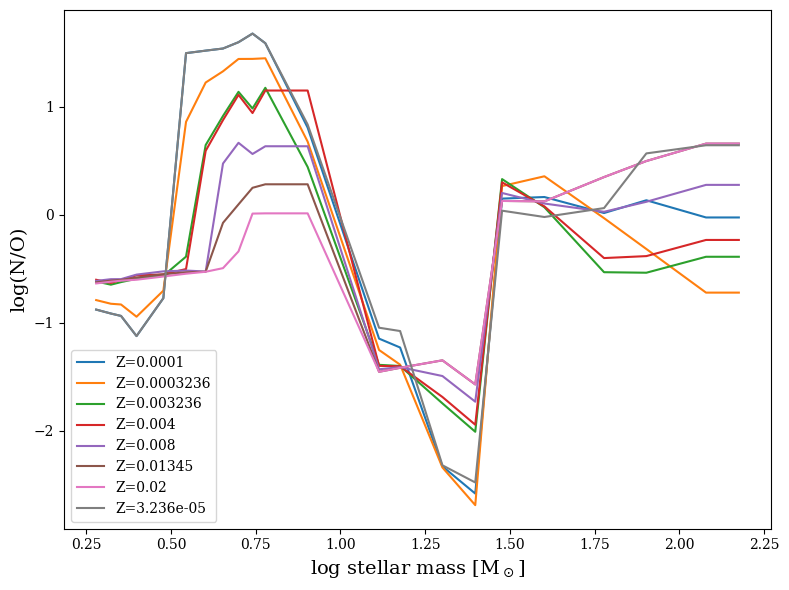

In [17]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

def load_data_with_names(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    data_dict = {}
    for i in range(len(lines)):
        line = lines[i].strip()
        if line.startswith("#"):
            row_name = line[1:].strip()
            if i + 1 < len(lines):
                data = list(map(float, lines[i + 1].strip().split()))
                data_dict[row_name] = data
    return data_dict

def plot_NO_yields(file_paths_N, file_paths_O):
    plt.figure(figsize=(8, 6))
    # Sort both lists to ensure matching order
    file_paths_N.sort()
    file_paths_O.sort()
    plt.rc('font', family='serif')
    for path_N, path_O in zip(file_paths_N, file_paths_O):
        data_N = load_data_with_names(path_N)
        data_O = load_data_with_names(path_O)
        mass = np.array(data_N['mass'])
        N_eject_mass = np.array(data_N['N_eject_mass'])
        O_eject_mass = np.array(data_O['O_eject_mass'])
        # Try to get metallicity from the data, otherwise use filename
        label = data_N.get('metallicity', [None])[0]
        if label is None:
            label = os.path.basename(path_N)
        with np.errstate(divide='ignore', invalid='ignore'):
            NO_ratio = np.where(O_eject_mass > 0, N_eject_mass / O_eject_mass, np.nan)
            plt.plot(np.log10(mass[5:]), np.log10(NO_ratio[5:]), label=f'Z={label}')
    plt.xlabel('log stellar mass [M$_\odot$]', fontsize=14)
    plt.ylabel('log(N/O)', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.savefig('./figs/NO_yields.png', dpi=300)
    plt.show()

# Example usage:
file_paths_N = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables/rearranged___/setllar_N_eject_mass_from_Limongi_R300/*.txt')
file_paths_O = glob.glob('/Users/adriana_work/Desktop/galIMF/yield_tables/rearranged___/setllar_O_eject_mass_from_Limongi_R300/*.txt')
plot_NO_yields(file_paths_N, file_paths_O)